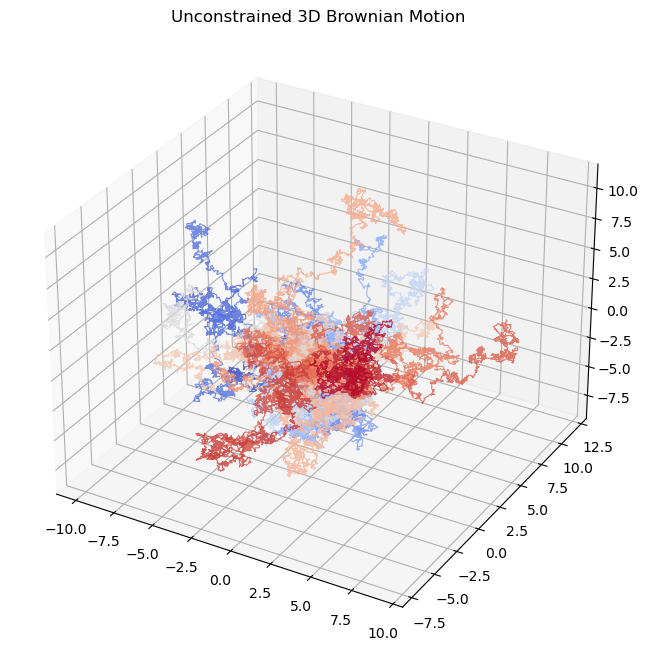

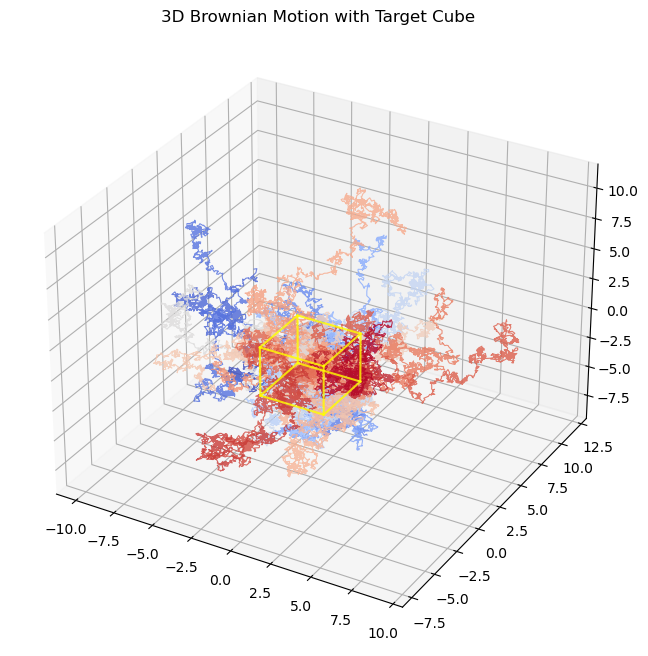

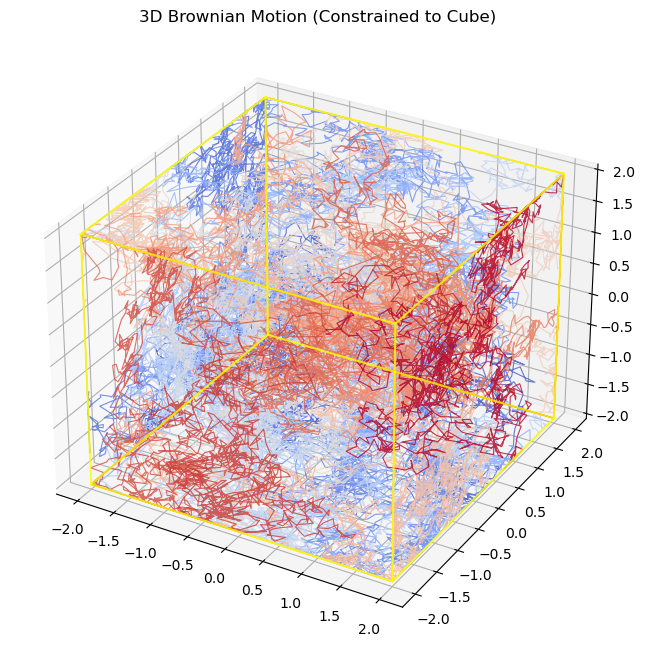

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations, product
from StochasticProcessSimulator import StochasticProcessSimulator

# Simulation parameters
num_paths = 35
path_length = 1500
dt = 0.01
cube_half_side_length = 2
# Function to plot 3D paths
def plot_3d_paths(paths, title, shape=None, constrained=False):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    cmap = plt.get_cmap('coolwarm')
    colors = cmap(np.linspace(0, 1, paths.shape[0]))
    for i in range(paths.shape[0]):
        ax.plot(paths[i, :, 0], paths[i, :, 1], paths[i, :, 2], color=colors[i], alpha=0.8, linewidth=0.8)
    
    if shape == 'cube':
        r = [-cube_half_side_length, cube_half_side_length]
        for s, e in combinations(np.array(list(product(r, r, r))), 2):
            if np.sum(np.abs(s - e)) == r[1] - r[0]:
                ax.plot3D(*zip(s, e), color="yellow", alpha=0.8)
    
    if constrained:
        ax.set_title(f"{title} (Constrained to {shape.capitalize()})")
    else:
        ax.set_title(title)
    
    plt.show()

# Function to constrain 3D Brownian motion within a cube
def constrain_to_cube(paths, half_side_length):
    for path in paths:
        for i in range(path.shape[0]):
            path[i] = np.clip(path[i], -half_side_length, half_side_length)
    return paths

# Initialize the simulator for 3D Brownian motion
simulator = StochasticProcessSimulator(
    process_type='dDimensionalBM', num_paths=num_paths, path_length=path_length, dt=dt, d=3
)

# Simulate unconstrained 3D Brownian motion
unconstrained_paths = simulator.simulate()

# Plot unconstrained 3D Brownian motion
plot_3d_paths(unconstrained_paths, "Unconstrained 3D Brownian Motion")

# Plot 3D Brownian motion with target cube
cube_half_side_length = 2
plot_3d_paths(unconstrained_paths, "3D Brownian Motion with Target Cube", shape='cube')

# Simulate 3D Brownian motion constrained within a cube
constrained_paths = constrain_to_cube(unconstrained_paths.copy(), cube_half_side_length)

# Plot constrained 3D Brownian motion
plot_3d_paths(constrained_paths, "3D Brownian Motion", shape='cube', constrained=True)

